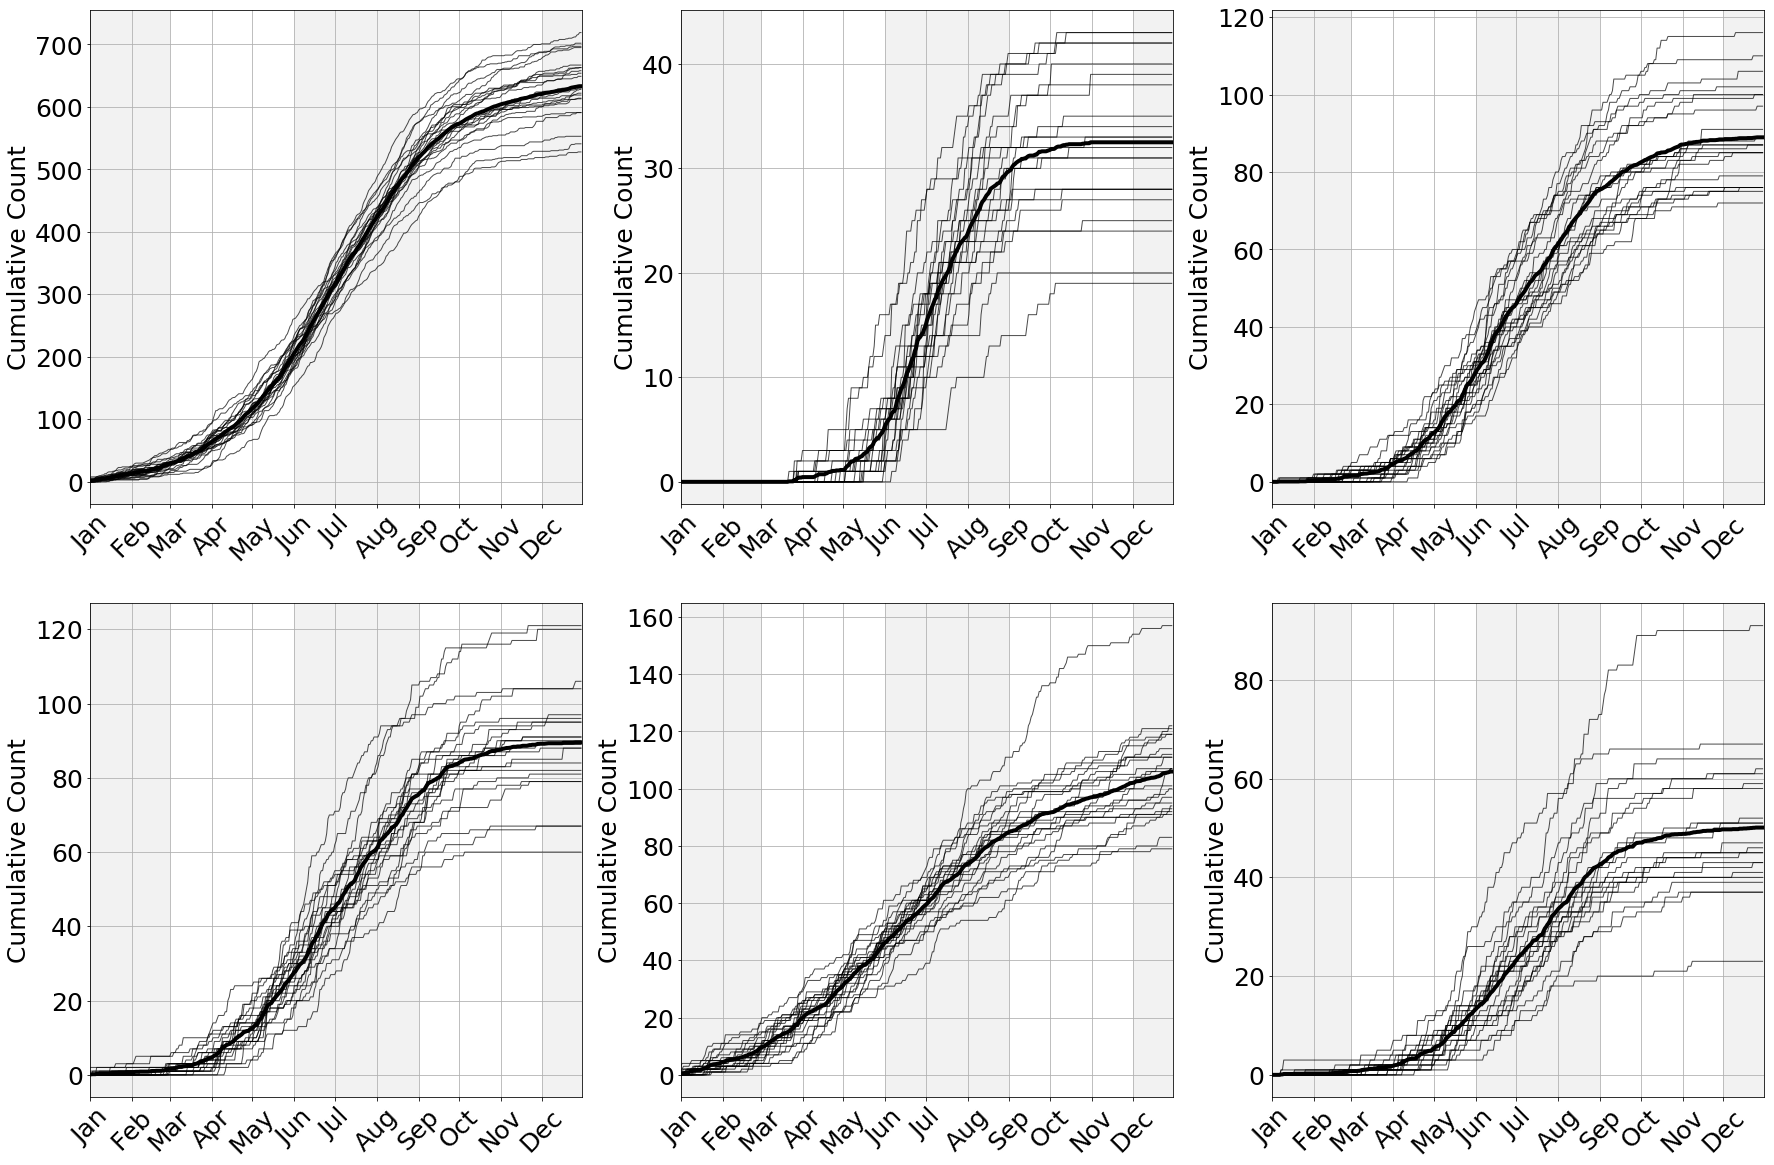

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

month_doy = {'Jan':1, 'Feb':32, 'Mar':60, 
             'Apr':91, 'May':121, 'Jun':152, 
             'Jul':182, 'Aug':213, 'Sep':244, 
             'Oct':274, 'Nov':305, 'Dec':335}

def draw_cumu_labels(ax):
    ax.set_xlim(1, 365)
    
    ax.set_xticks(list(month_doy.values()))
    ax.set_xticklabels(list(month_doy.keys()), rotation=45)
    
    ax.axvspan(month_doy['Jan'], month_doy['Mar'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Jun'], month_doy['Sep'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Dec'], 365, facecolor='0.5', alpha=0.1)
    ax.grid()
    return ax

plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
regions = {'conus':'CONUS', 'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'Northeast', 'north_plains':'North Plains'}

abrev = {'conus':'CO', 'cornbelt':'CB', 'high_plains':'HP', 
            'mid_south':'MS', 'north_east':'NE', 'north_plains':'NP'}

colors = ['lightgreen', 'darkkhaki', 'darkgreen', 'seagreen', 'khaki']

d = {'Year':[], 'Count':[], 'Region':[]}
ax = plt.subplot(1,1,1)

linetype = ['-', '--', ':', '-', '--', ':']
color = ['k', 'k', 'k', 'lightgrey', 'lightgrey', 'lightgrey']

track_loc = "../data/track_data/"

for count, key in enumerate(['econus', 'north_plains', 'high_plains', 'cornbelt', 'mid_south', 'north_east']):
    
    ax = plt.subplot(2, 3, count+1)

    df_select = pd.read_csv(track_loc + key + "_mcs_swaths.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')

    df_select['doy'] = df_select.index.dayofyear
    years = df_select.groupby(df_select.index.year)
    year_data = np.zeros(shape=(22, 365))

    texts = []

    for yid, year in years:

        data = []

        if yid in [1996, 2000, 2004, 2008, 2012, 2016]:

            #iterate 1 to 366 days
            for i in range(1, 367):

                #business as usual
                if i != 60:
                    s_count = year[year['doy'].values <= i]
                    data.append(s_count.storm_num.nunique())

                #Otherwise, set February 29th to February 28th count 
                else:
                    s_count = year[year['doy'].values <= i]
                    data[-1] = s_count.storm_num.nunique()
        else:

            #iterate 1 to 365 days
            for i in range(1, 366):
                s_count = year[year['doy'].values <= i]
                data.append(s_count.storm_num.nunique())

        year_data[yid-1996, :] = np.array(data)
        
        ax.plot(data, 'k-', linewidth=1, alpha=0.7)
        d['Year'].append(yid)
        d['Count'].append(data[-1])
        d['Region'].append(key)

    #ax.set_title(key)
    ax.plot(np.mean(year_data, axis=0), 'k-', linewidth=4)
    ax.set_ylabel("Cumulative Count", fontsize=25)

    draw_cumu_labels(ax)
    
    
plt.savefig("Fig3.tif", bbox_inches='tight', dpi=300)

In [ ]:
year_dat

In [18]:
np.argmax(year_data[:,-1])

5

C:\Users\ahaberlie1\AppData\Local\Continuum\anaconda3\envs\tensorflow3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


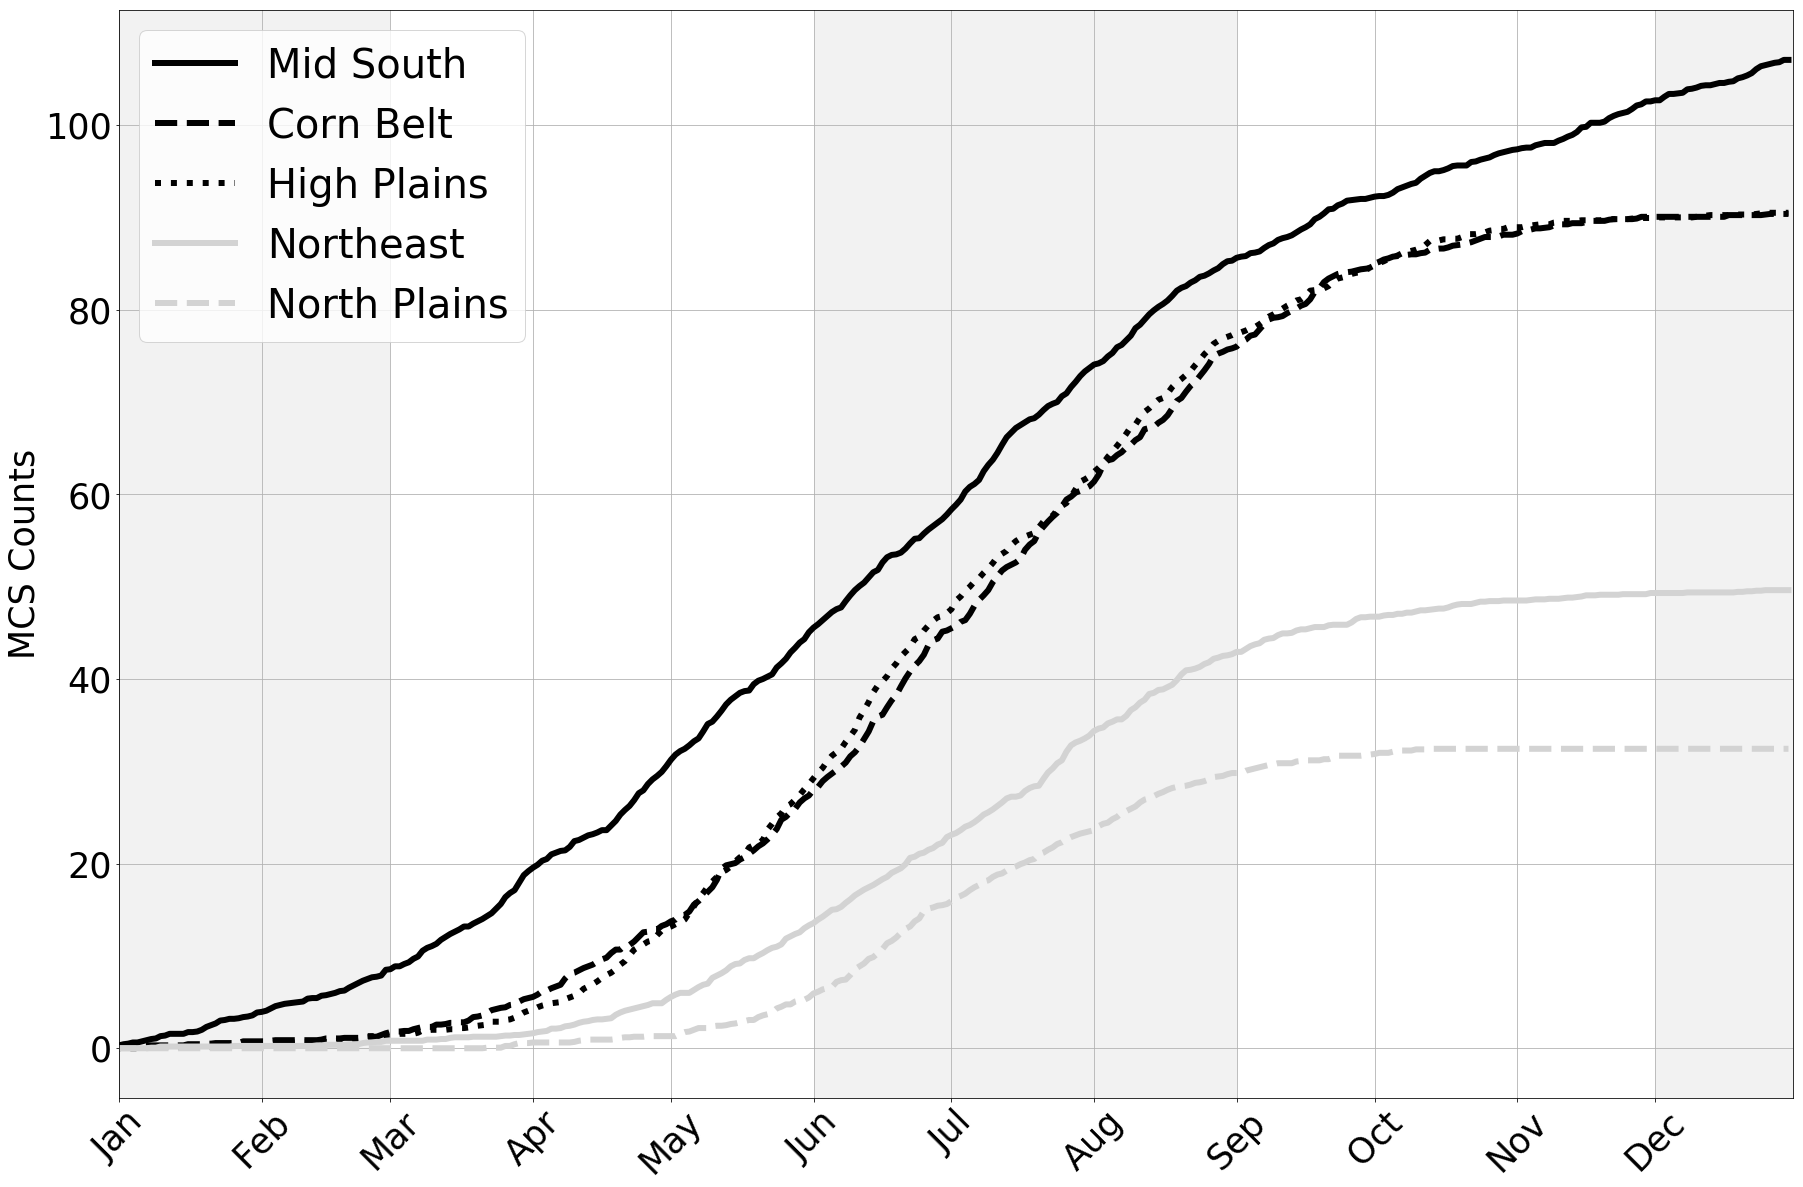

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35

regions = {'econus':'E. CONUS', 'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'Northeast', 'north_plains':'North Plains'}

ax = plt.subplot(1,1,1)

def draw_cumu_labels(ax):
    ax.set_xlim(1, 365)
    
    ax.set_xticks(list(month_doy.values()))
    ax.set_xticklabels(list(month_doy.keys()), rotation=45)
    
    ax.axvspan(month_doy['Jan'], month_doy['Mar'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Jun'], month_doy['Sep'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Dec'], 365, facecolor='0.5', alpha=0.1)
    ax.grid()
    return ax

linetype = ['-', '--', ':', '-', '--', ':']
color = ['k', 'k', 'k', 'lightgrey', 'lightgrey', 'lightgrey']

ax = plt.subplot(1, 1, 1)

for count, key in enumerate(['mid_south', 'cornbelt', 'high_plains', 'north_east', 'north_plains']):
    
    df_select = pd.read_csv(track_loc + key + "_mcs_swaths_within.csv")
        
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')
    

    df_select['doy'] = df_select.index.dayofyear
    years = df_select.groupby(df_select.index.year)
    year_data = np.zeros(shape=(16, 365))

    for yid, year in years:
        
        if yid >= 2002:
            data = []

            if yid in [2004, 2008, 2012, 2016]:

                #iterate 1 to 366 days
                for i in range(1, 367):

                    #business as usual
                    if i != 60:
                        s_count = year[year['doy'].values <= i]
                        data.append(s_count.storm_num.nunique())

                    #Otherwise, add February 29th to February 28th count 
                    else:
                        s_count = year[year['doy'].values <= i]
                        data[-1] = s_count.storm_num.nunique()
            else:

                #iterate 1 to 365 days
                for i in range(1, 366):
                    s_count = year[year['doy'].values <= i]
                    data.append(s_count.storm_num.nunique())

            year_data[yid-2002, :] = np.array(data)
        
    #ax.set_title(key)
    ax.plot(np.mean(year_data, axis=0), color=color[count], 
            ls=linetype[count], linewidth=6, label=regions[key])

draw_cumu_labels(ax)
ax.legend(loc=2, prop={'size':40})
ax.set_ylabel("MCS Counts", fontsize=35)
#ax.set_title("Cumulative MCS Preciptation Volume")

plt.savefig("Fig10b.tif", bbox_inches='tight', dpi=300)

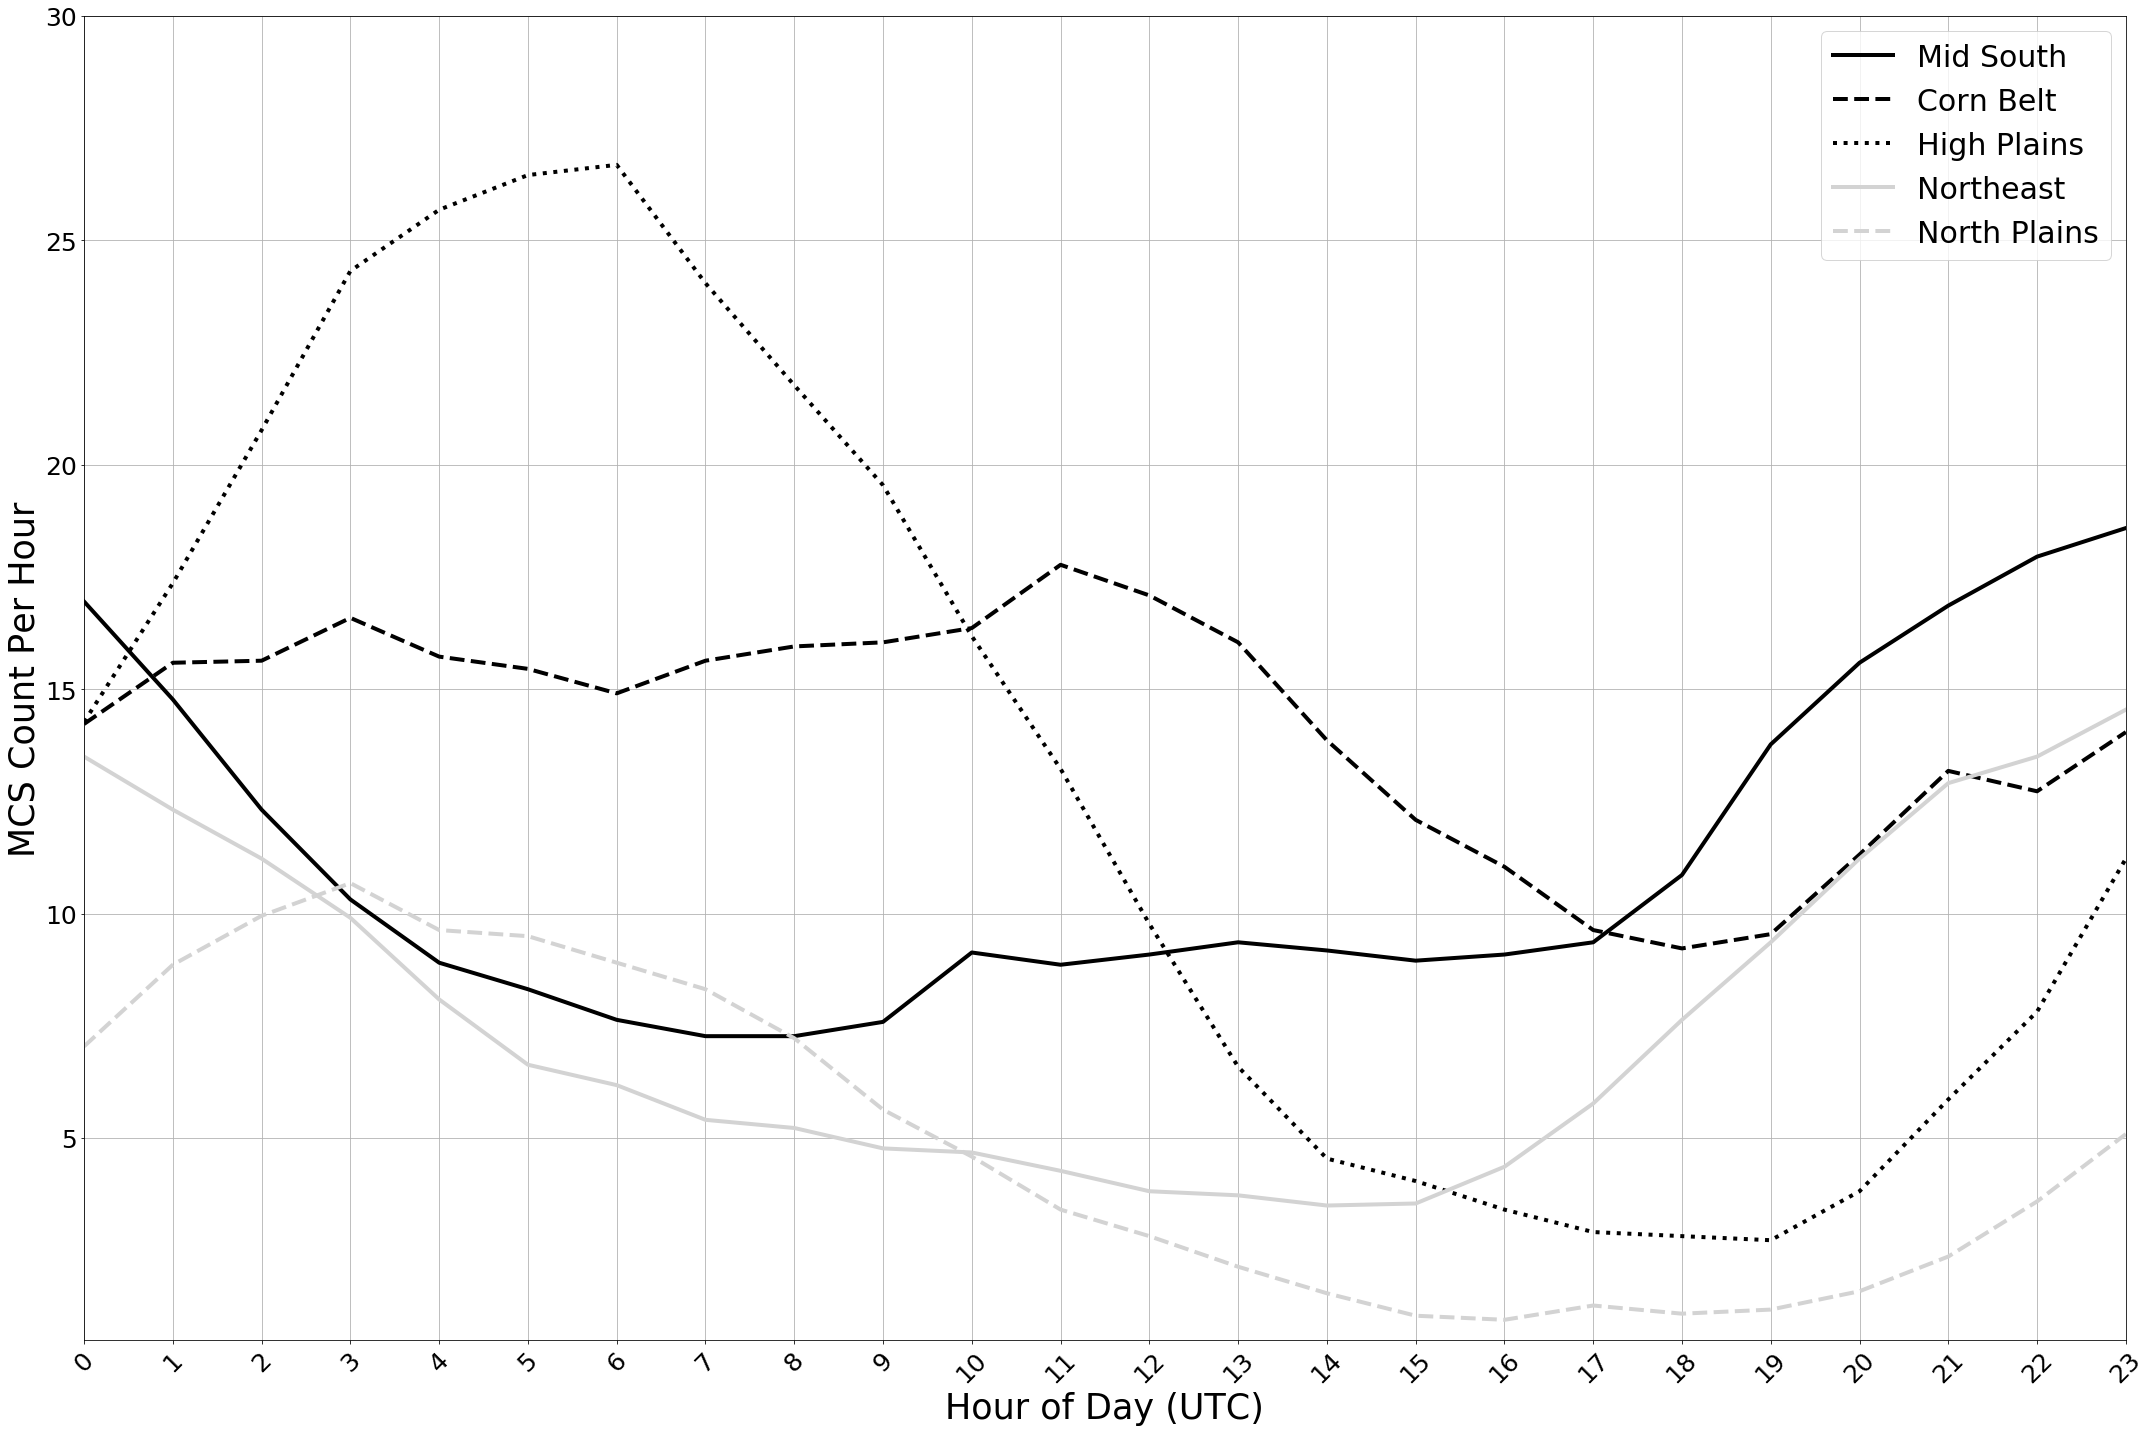

In [28]:
plt.rcParams['figure.figsize'] = 30, 20

def draw_hour_labels(ax, lab):
    ax.set_xlim(0, 23)
    ax.legend(prop={'size': 30})
    ax.set_xlabel("Hour of Day (UTC)", fontsize=35)
    ax.set_xticks(list(range(0, 24)))
    ax.set_xticklabels(list(range(0, 24)), rotation=45)
    #ax.set_title(lab + " Swath Count by Hour of Day", fontsize=20)
    ax.grid()
    return ax

linetype = ['-', '--', ':', '-', '--', ':']
color = ['k', 'k', 'k', 'lightgrey', 'lightgrey', 'lightgrey']

ax = plt.subplot(1, 1, 1)

regions = {'econus':'E. CONUS', 'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'Northeast', 'north_plains':'North Plains'}

for count, key in enumerate(['mid_south', 'cornbelt', 'high_plains', 'north_east', 'north_plains']):

    df_select = pd.read_csv(track_loc + key + "_mcs_swaths_within.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')

    df_ = df_select[df_select.index.month.isin([5,6,7,8])].copy()

    years = df_.groupby(df_.index.year)
    year_data = np.zeros((22, 24), dtype=int)

    for yid, year in years:

        hour_data = []
        for hid in range(0, 24):

            hour = year[year.index.hour==hid].copy()
            hour_data.append(hour.storm_num.nunique())

        year_data[yid-1996, :] = np.array(hour_data)

    ax.plot(np.mean(year_data, axis=0), color=color[count], 
            ls=linetype[count], label=regions[key], linewidth=4)

ax.set_ylabel("MCS Count Per Hour", fontsize=35)
ax = draw_hour_labels(ax, key.upper())
ax.set_ylim(0.5, 30)
plt.tight_layout()

plt.savefig("Fig4.tif", bbox_inches='tight', dpi=300)

C:\Users\ahaberlie1\AppData\Local\Continuum\anaconda3\envs\tensorflow3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


area Corn Belt Annual Max 419060.0 Min 14164.0 Mean 55491.7652101593
area Corn Belt Sep-Apr Max 284832.0 Min 14508.0 Mean 56296.25675842488
area Corn Belt May-Aug Max 419060.0 Min 14164.0 Mean 55210.37899917966
area North Plains Annual Max 182184.0 Min 14500.0 Mean 38222.46235199448
area North Plains Sep-Apr Max 153112.0 Min 14620.0 Mean 38836.677740863786
area North Plains May-Aug Max 182184.0 Min 14500.0 Mean 38151.31862493586
area Mid South Annual Max 446712.0 Min 14232.0 Mean 67478.90494422257
area Mid South Sep-Apr Max 446712.0 Min 14332.0 Mean 84792.00495476088
area Mid South May-Aug Max 289364.0 Min 14232.0 Mean 49354.66516321813
area High Plains Annual Max 348840.0 Min 14196.0 Mean 51544.18240769794
area High Plains Sep-Apr Max 348840.0 Min 14196.0 Mean 57062.57059292741
area High Plains May-Aug Max 273208.0 Min 14392.0 Mean 49582.58721232456
area Northeast Annual Max 243780.0 Min 14236.0 Mean 43191.891028766455
area Northeast Sep-Apr Max 243780.0 Min 14708.0 Mean 49149.0095879

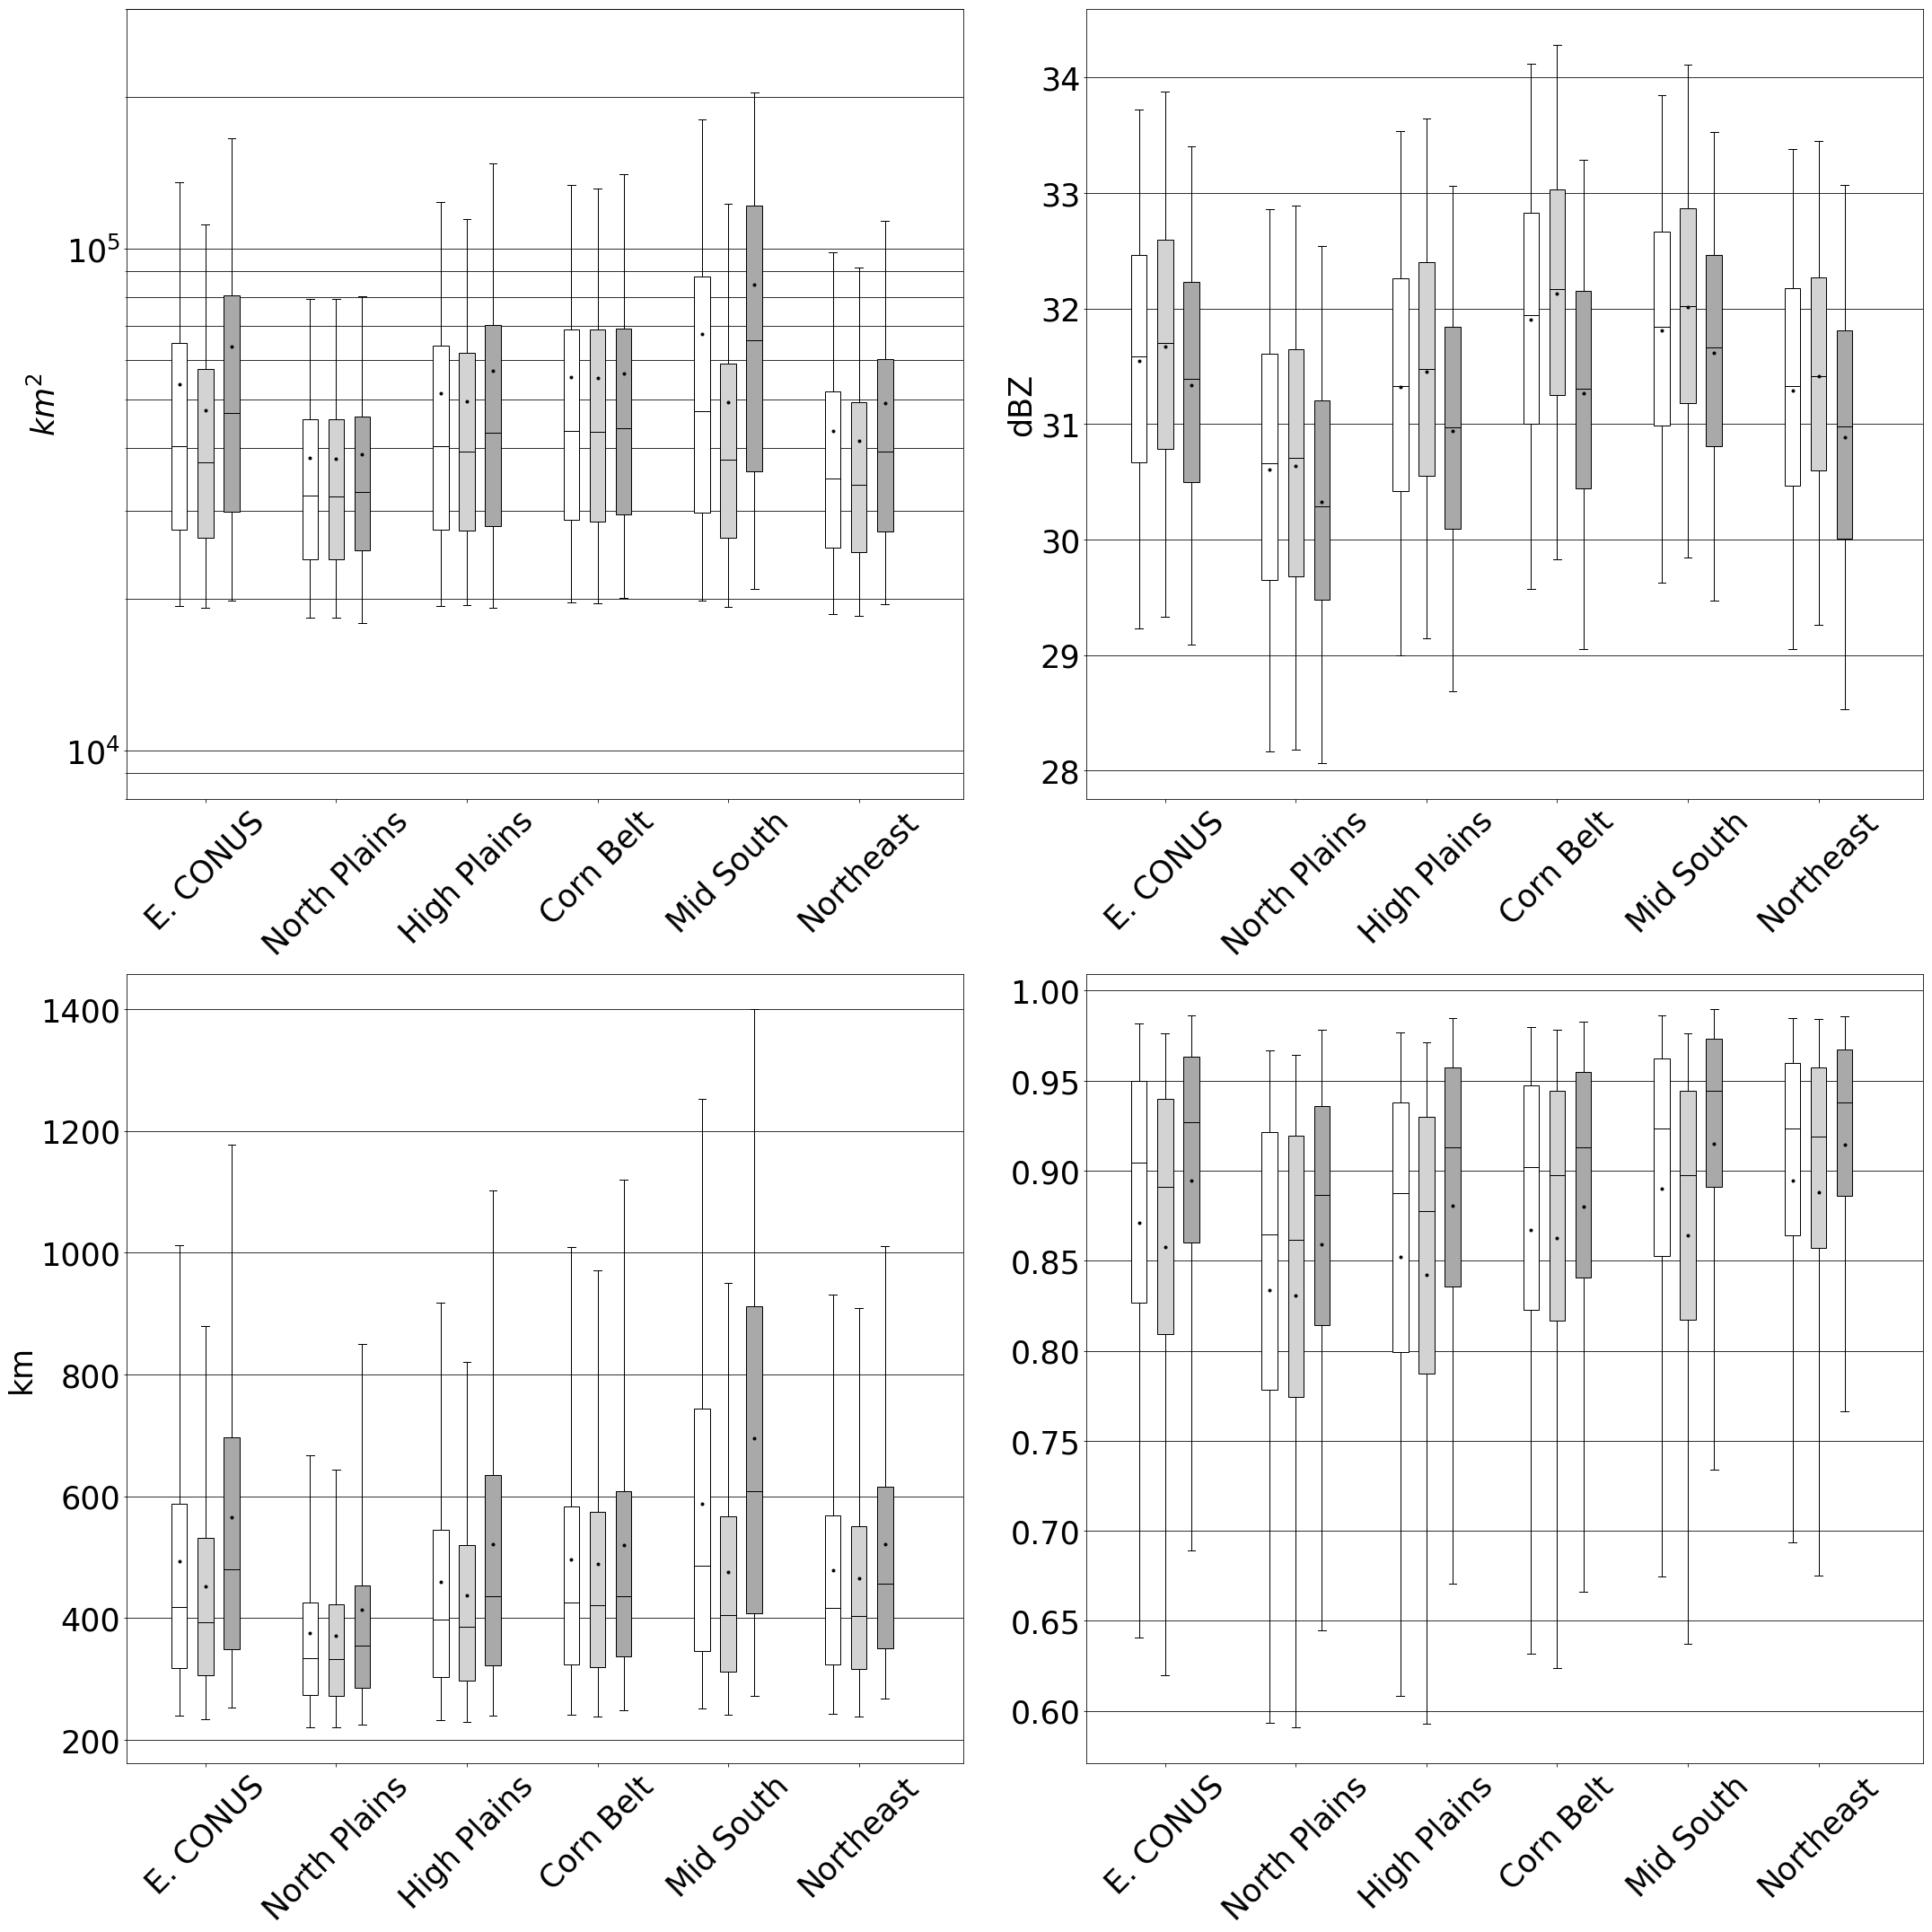

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

plt.rcParams['figure.figsize'] =30,30
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35

from matplotlib.patches import Polygon

regions = {'CONUS':'econus', 'High Plains':'high_plains', 'Corn Belt':'cornbelt', 
           'Mid South':'mid_south', 'Northeast':'north_east',
           'North Plains': 'north_plains'}
 

meanpointprops = dict(marker='.', markeredgecolor='black',
                      markerfacecolor='black')

colors = ['w', 'lightgrey', 'darkgrey']

labels = {'area': r'$km^2$', 'mean_intensity':'dBZ', 'major_axis_length':'km', 'eccentricity':' '}

for fignum, var in enumerate(['area', 'mean_intensity', 'major_axis_length', 'eccentricity']):
    
    results = {'CONUS':{'Annual':None, 'May-Aug':None, 'Sep-Apr':None}, 
           'High Plains':{'Annual':None, 'May-Aug':None, 'Sep-Apr':None},
           'Corn Belt': {'Annual':None, 'May-Aug':None, 'Sep-Apr':None},
           'Mid South': {'Annual':None, 'May-Aug':None, 'Sep-Apr':None},
           'Northeast': {'Annual':None, 'May-Aug':None, 'Sep-Apr':None},
           'North Plains': {'Annual':None, 'May-Aug':None, 'Sep-Apr':None}}
    
    for count, key in enumerate(['CONUS', 'North Plains', 'High Plains', 
                                 'Corn Belt', 'Mid South', 'Northeast']):

        value = regions[key]

        df_select = pd.read_csv(track_loc + value + "_mcs_swaths_within.csv")
        df_select['datetime'] = pd.to_datetime(df_select.datetime)
        df_select = df_select.set_index('datetime')

        ax = plt.subplot(2, 2, fignum+1)
        
        results[key]['Annual'] = df_select[var].values
        
        results[key]['May-Aug'] = df_select[df_select.index.month.isin([5,6,7,8])][var].values
        results[key]['Sep-Apr'] = df_select[df_select.index.month.isin([9, 10, 11, 12, 1, 2, 3, 4])][var].values

    i = 0
    for region in ['CONUS', 'North Plains', 'High Plains', 
                   'Corn Belt', 'Mid South', 'Northeast']:
        
        periods = results[region]
    
        for seas, period in enumerate(['Annual', 'May-Aug', 'Sep-Apr']):

            dist = periods[period]
            bplot = ax.boxplot(dist, positions=[i], whis=[5, 95], patch_artist=True,
                               showfliers=False, showmeans=True, meanprops=meanpointprops)

            plt.setp(bplot['medians'], color='black')

            [item.set_color('black') for item in bplot['means']] 
            
            [patch.set_facecolor(colors[seas]) for patch in bplot['boxes']]

            i += .25
        i += .5
    
    ax.set_xlim(-0.5, i) 
    
    #ax.set_title(labs[spl], fontsize=30)
    ax.set_ylabel(labels[var], fontsize=35)

    if var == 'area':
        ax.set_yscale('log')
        ax.set_ylim(8000, 300000)

    ax.yaxis.grid(b=True, which='both', color='k', linestyle='-')
    
    for region, region_val in results.items():
    
        for period, period_val in region_val.items():

            print(var, region, period, "Max", np.max(period_val), "Min", np.min(period_val), "Mean", np.mean(period_val))
    
for i in range(4):

    ax = plt.subplot(2, 2, i+1)
    ax.set_xticks([.25, 1.5, 2.75, 4, 5.25, 6.5])
    ax.set_xticklabels(['E. CONUS', 'North Plains', 'High Plains', 
                                 'Corn Belt', 'Mid South', 'Northeast'], fontsize=35, rotation=45)

    plt.tight_layout()
    
plt.savefig("Fig5.tif", bbox_inches='tight', dpi=300)

In [13]:
from scipy.spatial.distance import pdist

df = pd.read_csv(track_loc + "econus_mcs_swaths.csv")
df['datetime'] = pd.to_datetime(df.datetime)
df = df.set_index('datetime')

monthly = np.zeros(shape=(13, 23), dtype=int)

for i, year in enumerate(range(1996, 2018)):
    
    df_ = df[(df.index.year==year)].copy()
    df_['month'] = df_.index.month
             
    df_first = df_.groupby('storm_num').first()
    
    for j, month in enumerate(range(1, 13)):
    
        df_m = df_first[df_first.month==month]
        
        monthly[j, i] = len(np.unique(df_m.index))

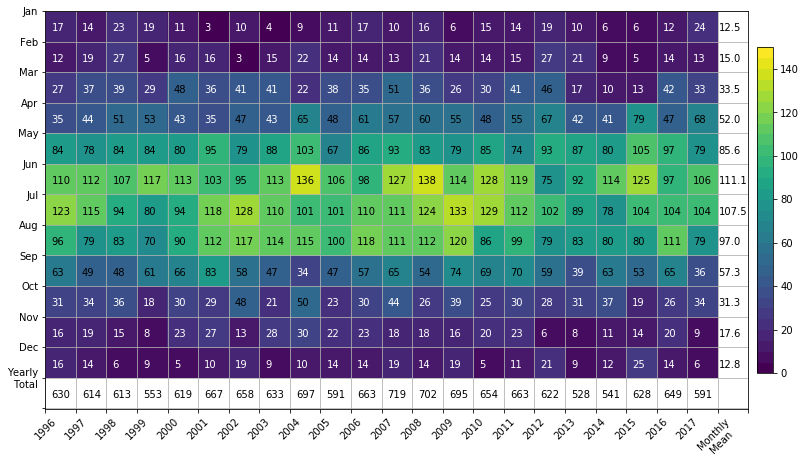

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

mon = monthly.copy()
mon[-1, :] = -1
mon[:, -1] = -1

mon = np.ma.masked_where(mon<0, mon)

from matplotlib.colors import BoundaryNorm
cmap = plt.cm.viridis
classes = list(range(0, 155, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.imshow(mon, norm=norm, cmap=cmap)

plt.xticks(np.array(range(0, 24))-.5, list(range(1996, 2018))+["Monthly\nMean"], rotation=45)
plt.yticks(np.array(range(0, 14))-.53, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                                       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Yearly\nTotal'])
plt.colorbar(shrink=.4, pad=0.01)
plt.grid()

for i in range(12):
    for j in range(22):
        
        if monthly[i, j] <= 45:
            plt.annotate(monthly[i, j], xy=(j-.3, i+.13), color='w')
        else:
            plt.annotate(monthly[i, j], xy=(j-.3, i+.13), color='k')
        
yr = np.sum(monthly, axis=0)
for i in range(22):
    plt.text(i-.3, 12+.13, yr[i])
    
mn = np.sum(monthly, axis=1)
for i in range(12):
    plt.text(22-.48, i+.13, "%.1f" % (mn[i]/22))
    
plt.savefig("Fig2.tif", bbox_inches='tight', dpi=300)

In [38]:
from scipy.stats import variation

counts = pd.DataFrame.from_dict(d)

for gid, group in counts.groupby('Region'):
    
    g = group.sort_values(by='Count', ascending=False)
    
    print(g)
    print(print('Mean MCS', np.mean(g.Count.values)))
    print(print('C.V. MCS', variation(g.Count.values)))

    Count    Region  Year
80    121  cornbelt  2010
76    120  cornbelt  2006
78    106  cornbelt  2008
77    104  cornbelt  2007
68     97  cornbelt  1998
70     96  cornbelt  2000
71     95  cornbelt  2001
81     95  cornbelt  2011
86     91  cornbelt  2016
87     91  cornbelt  2017
74     90  cornbelt  2004
75     89  cornbelt  2005
72     88  cornbelt  2002
66     88  cornbelt  1996
85     84  cornbelt  2015
84     82  cornbelt  2014
69     81  cornbelt  1999
73     79  cornbelt  2003
83     79  cornbelt  2013
67     67  cornbelt  1997
82     67  cornbelt  2012
79     60  cornbelt  2009
Mean MCS 89.54545454545455
None
C.V. MCS 0.16556318284174884
None
    Count  Region  Year
11    719  econus  2007
12    702  econus  2008
8     697  econus  2004
13    695  econus  2009
5     667  econus  2001
15    663  econus  2011
10    663  econus  2006
6     658  econus  2002
14    654  econus  2010
20    649  econus  2016
7     633  econus  2003
0     630  econus  1996
19    628  econus  2015


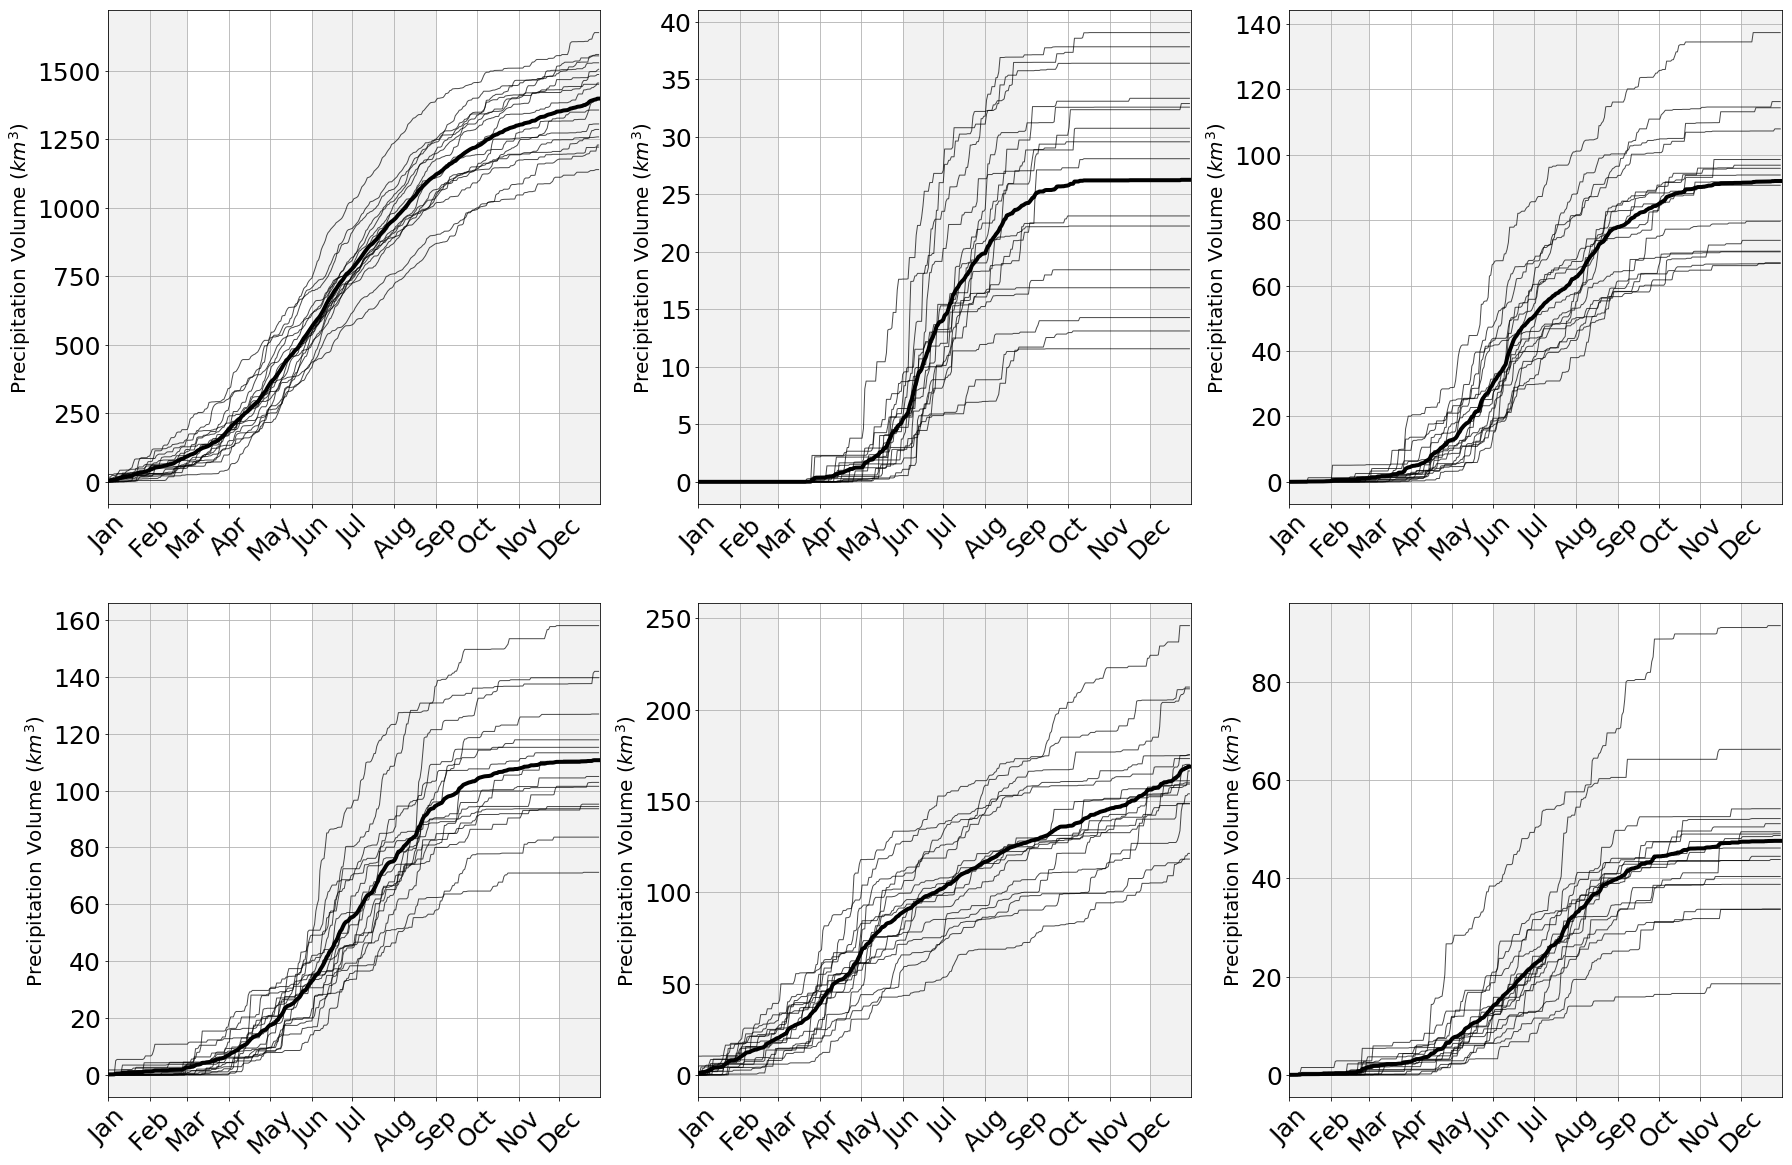

In [46]:
plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

d = {'Year':[], 'MCS_Vol':[], 'TOT_Vol':[], 'Region':[]}
ax = plt.subplot(1,1,1)

volume_loc = "../data/track_data/"

def draw_cumu_labels(ax):
    ax.set_xlim(1, 365)
    
    ax.set_xticks(list(month_doy.values()))
    ax.set_xticklabels(list(month_doy.keys()), rotation=45)
    
    ax.axvspan(month_doy['Jan'], month_doy['Mar'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Jun'], month_doy['Sep'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Dec'], 365, facecolor='0.5', alpha=0.1)
    ax.grid()
    return ax

for count, key in enumerate(['econus', 'north_plains', 'high_plains', 'cornbelt', 'mid_south', 'north_east']):
    
    ax = plt.subplot(2, 3, count+1)                       
    df_select = pd.read_csv(volume_loc + key + "_volume1.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')

    df_select['doy'] = df_select.index.dayofyear
    years = df_select.groupby(df_select.index.year)

    year_data = np.zeros(shape=(16, 365))

    texts = []

    for yid, year in years:

        data_mcs = []
        data = []
        
        if yid in [2004, 2008, 2012, 2016]:

            #iterate 1 to 366 days
            for i in range(1, 367):

                #business as usual
                if i != 60:
                    s_count = year[year['doy'].values <= i]
                    data.append(np.sum(s_count.cur_vol.values))
                    data_mcs.append(np.sum(s_count.cur_mcs.values))

                #Otherwise, add February 29th to February 28th count 
                else:
                    s_count = year[year['doy'].values <= i]
                    data[-1] = np.sum(s_count.cur_vol.values)
                    data_mcs[-1] = np.sum(s_count.cur_mcs.values)
        else:

            #iterate 1 to 365 days
            for i in range(1, 366):
                s_count = year[year['doy'].values <= i]
                data.append(np.sum(s_count.cur_vol.values))
                data_mcs.append(np.sum(s_count.cur_mcs.values))

        year_data[yid-2002, :] = np.array(data_mcs)
        
        ax.plot(data_mcs, 'k-', linewidth=1, alpha=0.7)

        #ax.set_title(key)
        d['Year'].append(yid)
        d['TOT_Vol'].append(data[-1])
        d['MCS_Vol'].append(data_mcs[-1])
        d['Region'].append(key)

    ax.plot(np.mean(year_data, axis=0), 'k-', linewidth=4)
    ax.set_ylabel("Precipitation Volume (" + r'$km^3$' + ")", fontsize=20)

    draw_cumu_labels(ax)
    
#plt.savefig("Fig8.tif", bbox_inches='tight', dpi=300)

C:\Users\ahaberlie1\AppData\Local\Continuum\anaconda3\envs\tensorflow3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


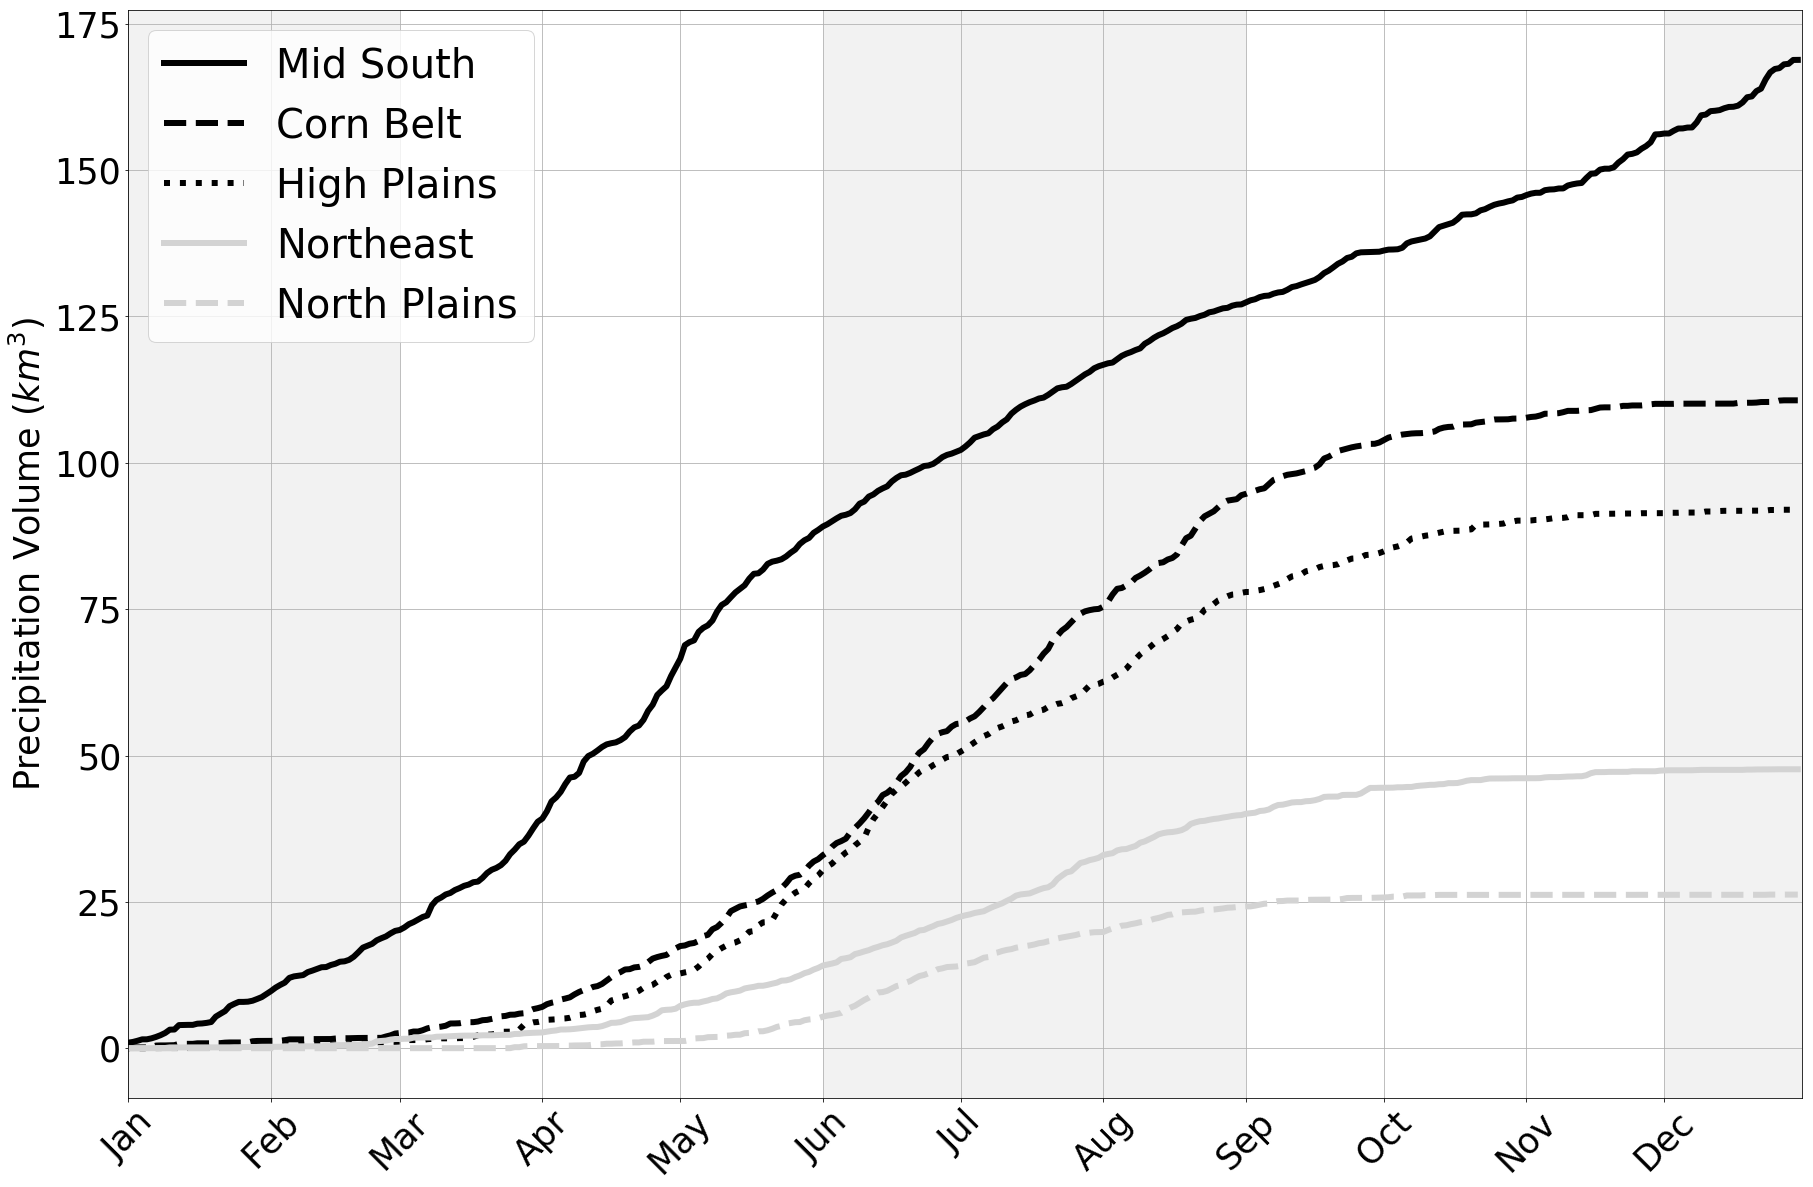

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35
regions = {'conus':'E. CONUS', 'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'Northeast', 'north_plains':'North Plains'}

linetype = ['-', '--', ':', '-', '--', ':']
color = ['k', 'k', 'k', 'lightgrey', 'lightgrey', 'lightgrey']

def draw_cumu_labels(ax):
    ax.set_xlim(1, 365)
    
    ax.set_xticks(list(month_doy.values()))
    ax.set_xticklabels(list(month_doy.keys()), rotation=45)
    
    ax.axvspan(month_doy['Jan'], month_doy['Mar'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Jun'], month_doy['Sep'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Dec'], 365, facecolor='0.5', alpha=0.1)
    ax.grid()
    return ax

for count, key in enumerate(['mid_south', 'cornbelt', 'high_plains', 'north_east', 'north_plains']):
    
    ax = plt.subplot(1, 1, 1)                       
    df_select = pd.read_csv(track_loc + key + "_volume1.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')

    df_day = df_select.resample('D').sum()
    df_day['doy'] = df_day.index.dayofyear
    
    df_day.loc[pd.isnull(df_day['cur_mcs']), 'cur_mcs'] = 0.0
    df_day.loc[pd.isnull(df_day['cur_vol']), 'cur_vol'] = 0.0
    years = df_day.groupby(df_day.index.year)

    year_data = np.zeros(shape=(16, 365))

    for yid, year in years:
        
        data = []

        if yid in [2004, 2008, 2012, 2016]:

            #iterate 1 to 366 days
            for i in range(1, 367):

                #business as usual
                if i != 60:
                    s_count = year[year['doy'].values <= i]
                    data.append(np.sum(s_count.cur_mcs.values)) 

                #Otherwise, add February 29th to February 28th count 
                else:
                    s_count = year[year['doy'].values <= i]
                    data[-1] = np.sum(s_count.cur_mcs.values)
        else:

            #iterate 1 to 365 days
            for i in range(1, 366):
                s_count = year[year['doy'].values <= i]
                data.append(np.sum(s_count.cur_mcs.values)) 
        
        year_data[yid-2002, :] = np.array(data)
        
    ax.plot(np.mean(year_data, axis=0), lw=6, color=color[count], linestyle=linetype[count], label=regions[key])

ax.set_ylabel("Precipitation Volume (" + r'$km^3$' + ")", fontsize=35)
draw_cumu_labels(ax)

ax.legend(loc=2, prop={'size':40})

plt.savefig("Fig10b.tif", bbox_inches='tight', dpi=300)

econus 1 14.863006327922616 5.67784927126117 30.795064649400047
econus 2 18.656621286792205 8.847328635756076 29.535790467753664
econus 3 26.808266787667925 11.067507989601364 38.64445430242269
econus 4 36.556282076580715 29.570265817828492 45.3336942349861
econus 5 40.09010030854928 32.57560070586155 46.51072103137656
econus 6 40.12263359430784 32.27391203509942 51.742420208973186
econus 7 36.15233068465702 31.249666887426848 42.15268448968451
econus 8 34.2968114315243 26.480555540930787 45.273793751048814
econus 9 25.504025437593192 15.481704864430185 34.211880948584295
econus 10 21.207036400916156 15.456012466547453 30.42472496375462
econus 11 17.954820067186716 7.964527384277571 27.96479887501453
econus 12 14.106734093103986 6.325258612297124 24.721387981152127
north_plains 1 0.0 0.0 0.0
north_plains 2 0.004193465166752191 0.0 0.016773860667008762
north_plains 3 4.158795210972349 0.0 20.953898493533387
north_plains 4 6.550298716313716 0.3609526179948672 15.455596616872452
north_pla

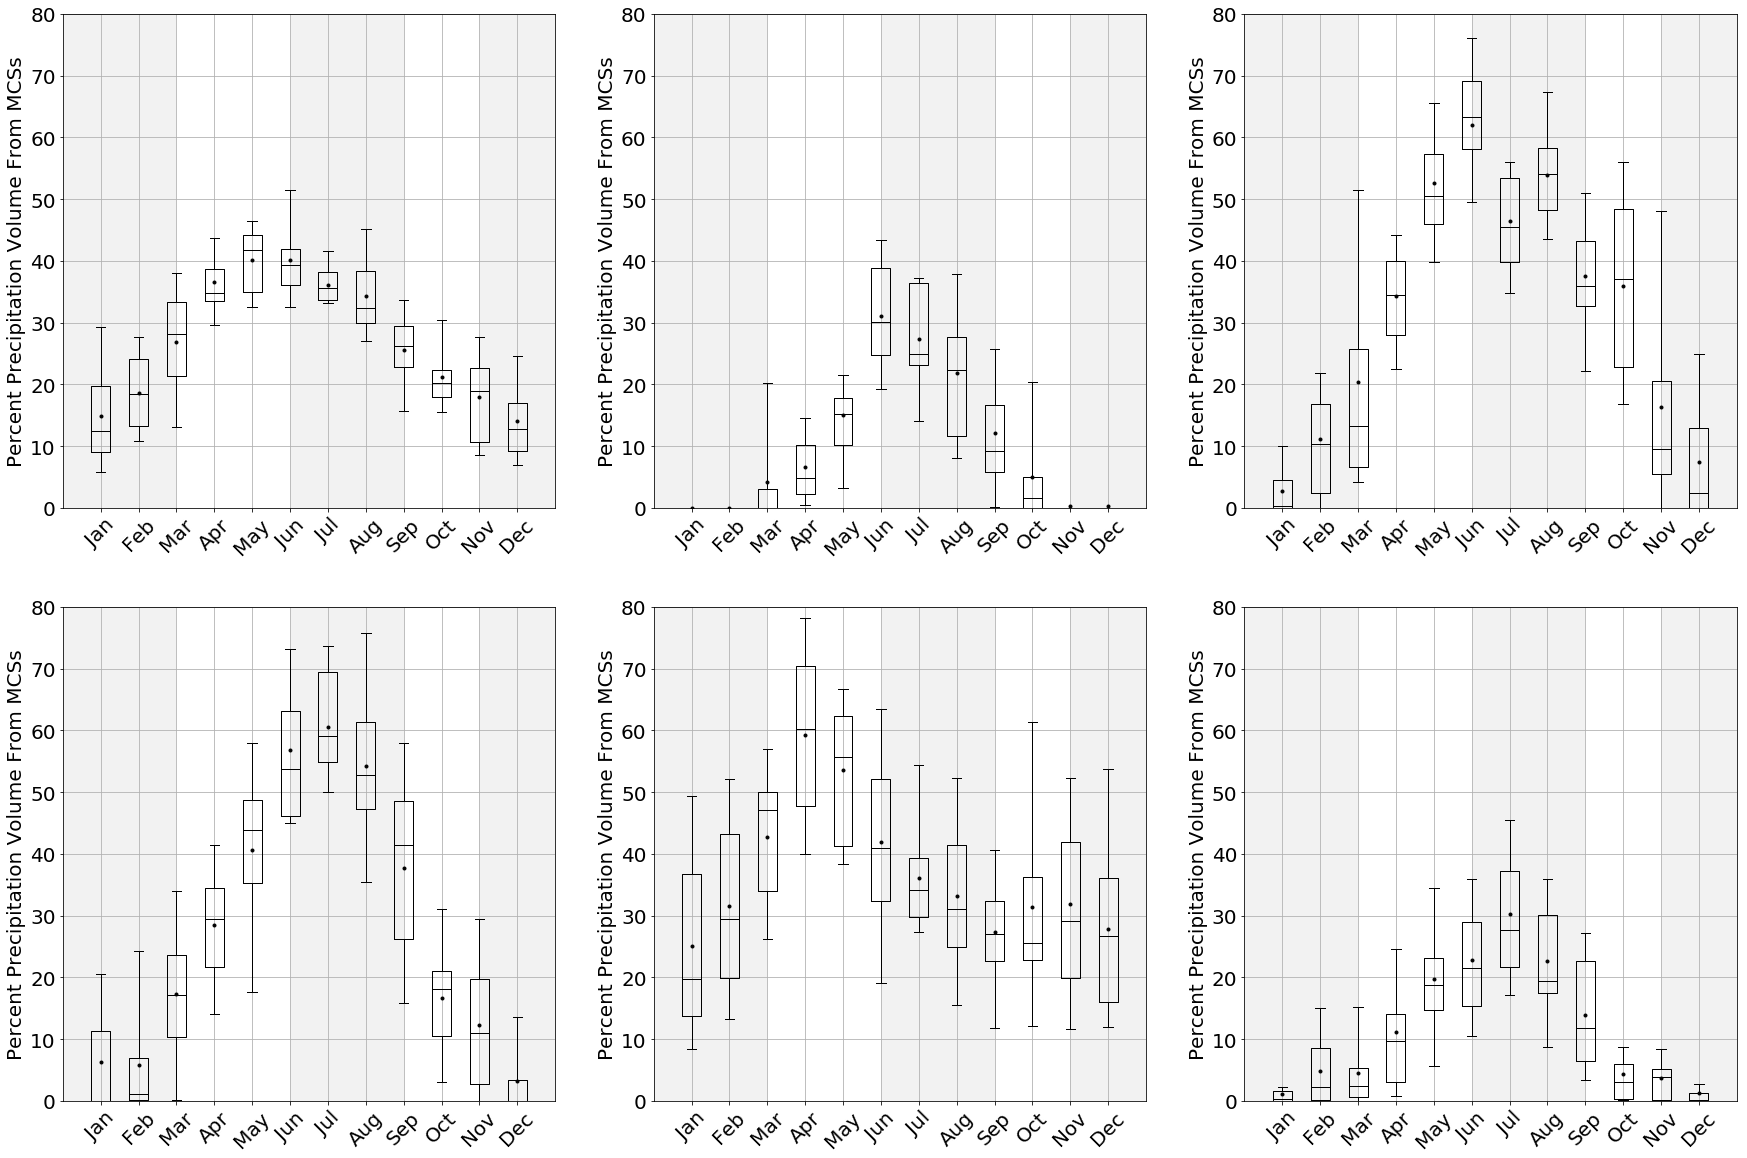

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def draw_cumu_labels(ax, ymax):
    ax.set_xlim(0, 13)
    ax.set_ylim(0, 80)
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    #ax.legend(loc=2, prop={'size': 25})
    ax.axvspan(0, 3, facecolor='0.5', alpha=0.1)
    ax.axvspan(6, 9, facecolor='0.5', alpha=0.1)
    ax.axvspan(11, 13, facecolor='0.5', alpha=0.1)
    ax.grid()
    #ax.set_ylabel("Cumulative Count", fontsize=35)
    return ax

meanpointprops = dict(marker='.', markeredgecolor='black',
                      markerfacecolor='black')
plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
regions = {'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'North East', 'north_plains':'North Plains'}


for count, key in enumerate(['econus', 'north_plains', 'high_plains', 'cornbelt', 'mid_south', 'north_east']):
    
    ax = plt.subplot(2, 3, count+1)                       
    df_select = pd.read_csv(track_loc + key + "_volume1.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')
    
    df_select.loc[pd.isnull(df_select['cur_mcs']), 'cur_mcs'] = 0.0
    df_select.loc[pd.isnull(df_select['cur_vol']), 'cur_vol'] = 0.0

    df_month = df_select.resample('M').mean()
    months = df_month.groupby(df_month.index.month)
    
    month_data = []
    for mid, month in months:
        data = month['cur_mcs']
        data1 = month['cur_vol']
        perc = 100*(np.array(data) / np.array(data1))
        month_data.append([x for x in perc])
        print(key, mid, np.mean(perc), np.percentile(perc, 5), np.percentile(perc, 95))
        
    bplot = ax.boxplot(month_data, positions=list(range(1, 13)), 
               whis=[5, 95], showfliers=False, showmeans=True, meanprops=meanpointprops)

    plt.setp(bplot['medians'], color='black')

    [item.set_color('black') for item in bplot['means']] 
    ax.set_ylabel("Percent Precipitation Volume From MCSs", fontsize=20)

    draw_cumu_labels(ax, 1)
    
plt.savefig("Fig9.tif", bbox_inches='tight', dpi=300)

econus 1 14.863006327922616 5.67784927126117 30.795064649400047
econus 2 18.656621286792205 8.847328635756076 29.535790467753664
econus 3 26.808266787667925 11.067507989601364 38.64445430242269
econus 4 36.556282076580715 29.570265817828492 45.3336942349861
econus 5 40.09010030854928 32.57560070586155 46.51072103137656
econus 6 40.12263359430784 32.27391203509942 51.742420208973186
econus 7 36.15233068465702 31.249666887426848 42.15268448968451
econus 8 34.2968114315243 26.480555540930787 45.273793751048814
econus 9 25.504025437593192 15.481704864430185 34.211880948584295
econus 10 21.207036400916156 15.456012466547453 30.42472496375462
econus 11 17.954820067186716 7.964527384277571 27.96479887501453
econus 12 14.106734093103986 6.325258612297124 24.721387981152127
north_plains 1 0.0 0.0 0.0
north_plains 2 0.004193465166752191 0.0 0.016773860667008762
north_plains 3 4.158795210972349 0.0 20.953898493533387
north_plains 4 6.550298716313716 0.3609526179948672 15.455596616872452
north_pla

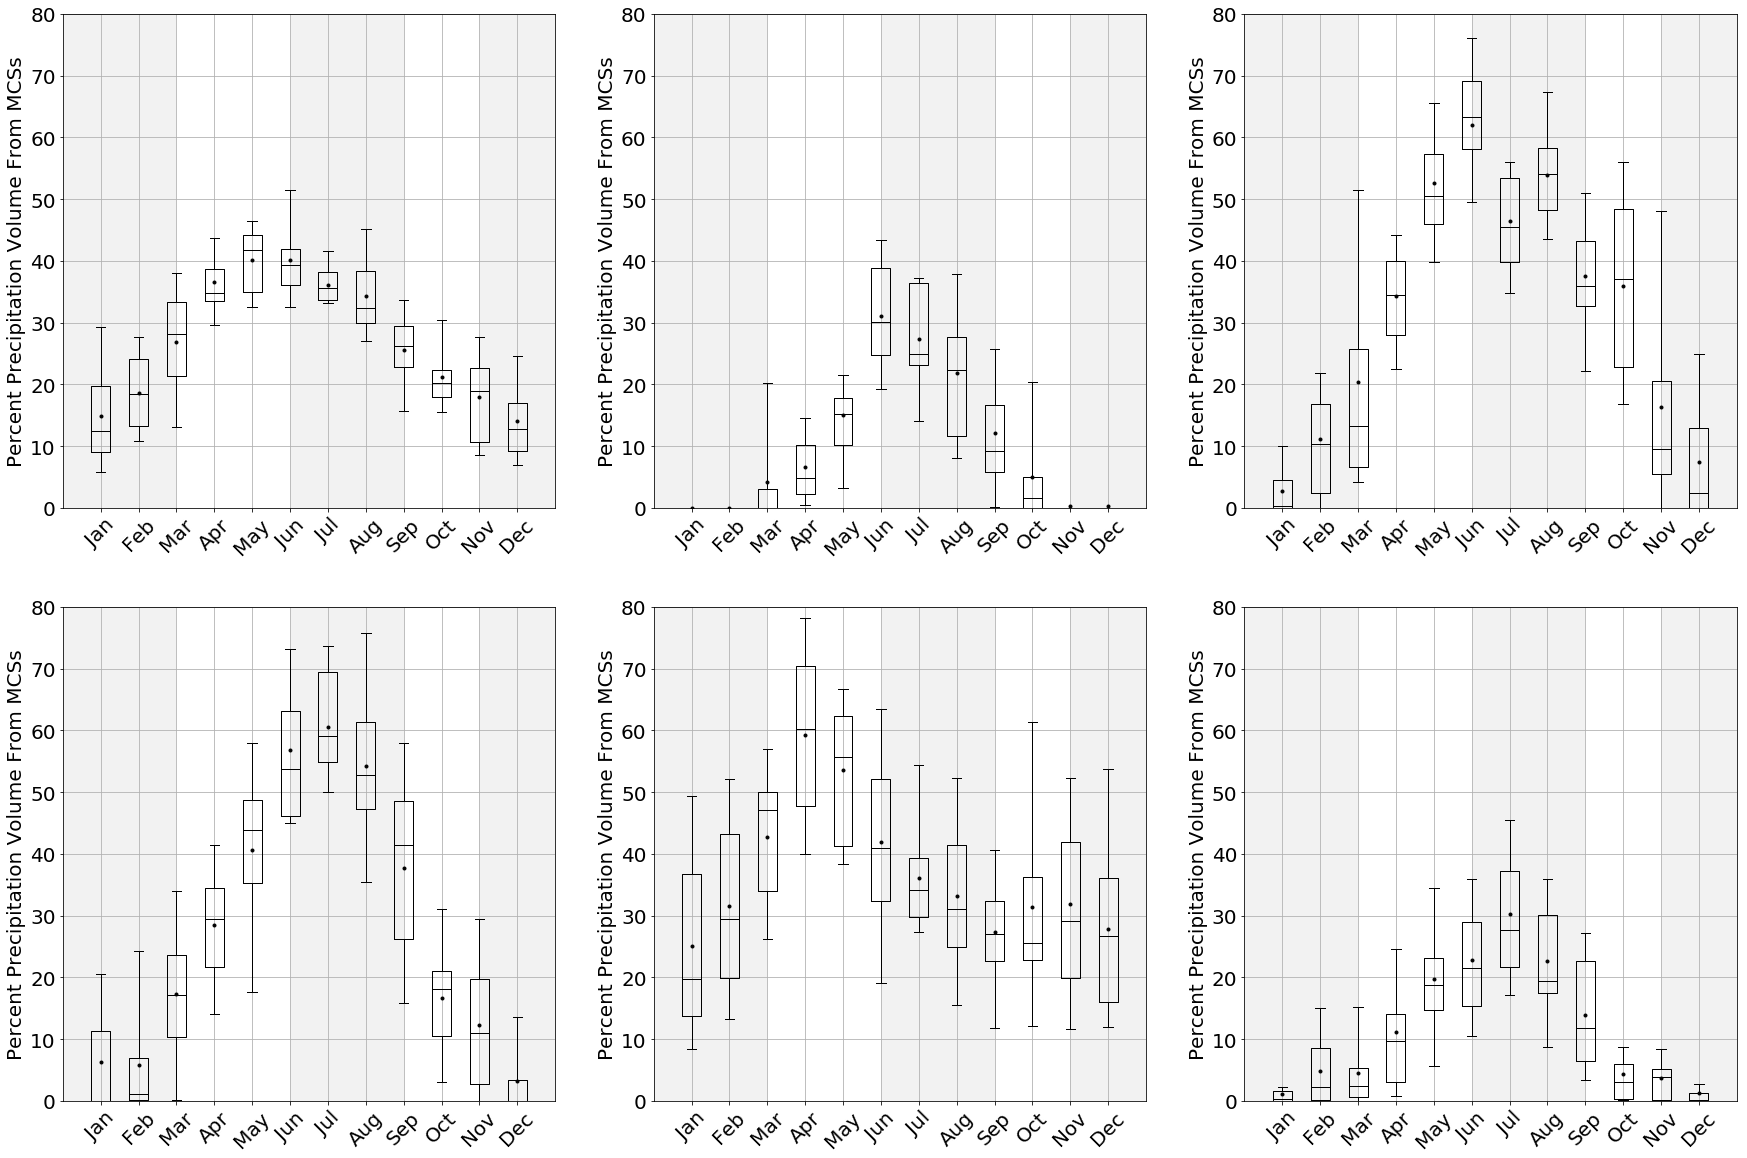

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def draw_cumu_labels(ax, ymax):
    ax.set_xlim(0, 13)
    ax.set_ylim(0, 80)
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    #ax.legend(loc=2, prop={'size': 25})
    ax.axvspan(0, 3, facecolor='0.5', alpha=0.1)
    ax.axvspan(6, 9, facecolor='0.5', alpha=0.1)
    ax.axvspan(11, 13, facecolor='0.5', alpha=0.1)
    ax.grid()
    #ax.set_ylabel("Cumulative Count", fontsize=35)
    return ax

meanpointprops = dict(marker='.', markeredgecolor='black',
                      markerfacecolor='black')
plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
regions = {'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'North East', 'north_plains':'North Plains'}


for count, key in enumerate(['econus', 'north_plains', 'high_plains', 'cornbelt', 'mid_south', 'north_east']):
    
    ax = plt.subplot(2, 3, count+1)                       
    df_select = pd.read_csv(track_loc + key + "_volume1.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')
    
    df_select.loc[pd.isnull(df_select['cur_mcs']), 'cur_mcs'] = 0.0
    df_select.loc[pd.isnull(df_select['cur_vol']), 'cur_vol'] = 0.0

    df_month = df_select.resample('M').mean()
    months = df_month.groupby(df_month.index.month)
    
    month_data = []
    for mid, month in months:
        data = month['cur_mcs']
        data1 = month['cur_vol']
        perc = 100*(np.array(data) / np.array(data1))
        month_data.append([x for x in perc])
        print(key, mid, np.mean(perc), np.percentile(perc, 5), np.percentile(perc, 95))
        
    bplot = ax.boxplot(month_data, positions=list(range(1, 13)), 
               whis=[5, 95], showfliers=False, showmeans=True, meanprops=meanpointprops)

    plt.setp(bplot['medians'], color='black')

    [item.set_color('black') for item in bplot['means']] 
    ax.set_ylabel("Percent Precipitation Volume From MCSs", fontsize=20)

    draw_cumu_labels(ax, 1)

In [48]:
counts

,MCS_Vol,Region,TOT_Vol,Year
0,1505.324220,econus,4760.141773,2002
1,1258.503083,econus,4423.943370,2003
2,1356.527733,econus,4832.158864,2004
3,1139.222689,econus,4274.187458,2005
4,1228.826740,econus,4426.978640,2006
5,1455.105021,econus,4416.495233,2007
6,1639.073088,econus,4843.188687,2008
7,1554.154574,econus,5003.045600,2009
8,1486.185244,econus,4495.324432,2010
9,1528.898252,econus,4629.958041,2011


In [49]:
from scipy.stats import variation
counts = pd.DataFrame.from_dict(d)



for gid, group in counts.groupby('Region'):
    
    g = group.sort_values(by='MCS_Vol', ascending=True)
    g['perc'] = 100*(g['MCS_Vol'] / g['TOT_Vol'])
    
    g = g.sort_values(by='perc', ascending=True)
    print(g)
    print(g[['MCS_Vol', 'TOT_Vol', 'perc']].mean())
    print('C.V. MCS', variation(g.MCS_Vol.values))
    print('C.V. Tot', variation(g.TOT_Vol.values))
    print("\n")

       MCS_Vol    Region     TOT_Vol  Year       perc
55   93.593264  cornbelt  345.238305  2009  27.109757
61  102.854741  cornbelt  369.194817  2015  27.859205
52  101.470820  cornbelt  327.890516  2006  30.946555
59  104.938762  cornbelt  335.828994  2013  31.247678
58   71.225648  cornbelt  224.987871  2012  31.657550
60  115.182664  cornbelt  355.124828  2014  32.434416
63  110.671490  cornbelt  340.112474  2017  32.539674
51   83.601101  cornbelt  255.478110  2005  32.723391
49   94.357600  cornbelt  273.167617  2003  34.542015
57  113.278421  cornbelt  316.378776  2011  35.804684
62  126.902411  cornbelt  340.724677  2016  37.244855
54  141.898234  cornbelt  378.790712  2008  37.460854
50  117.828564  cornbelt  310.084117  2004  37.998903
48   95.194789  cornbelt  245.113962  2002  38.836951
53  139.665818  cornbelt  333.589718  2007  41.867543
56  157.991368  cornbelt  334.236905  2010  47.269277
MCS_Vol    110.665981
TOT_Vol    317.871400
perc        34.846457
dtype: float64
C

In [ ]:
g